In [135]:
from keras.models import load_model
from keras.models import Model
from keras.layers import concatenate, Input
from keras.utils import CustomObjectScope
import tensorflow as tf 
from tensorflow import keras

# Load the model within the custom object scope
model1_path = "C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\saved_model.h5"
model2_path = "C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\saved_model2.h5"
model3_path = "C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\saved_model3.h5"
model4_path = "C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\modelDR.h5"
model1 = load_model(model1_path)
model2 = load_model(model2_path)
model3 = load_model(model3_path)


In [136]:
with CustomObjectScope({'relu': tf.nn.relu}):
    model1 = load_model(model1_path)
    model2 = load_model(model2_path)

In [34]:
# Rename layers in each model to ensure uniqueness
for i, layer in enumerate(model1.layers):
    layer._name = f"model1_layer_{i}"

for i, layer in enumerate(model2.layers):
    layer._name = f"model2_layer_{i}"

for i, layer in enumerate(model3.layers):
    layer._name = f"model3_layer_{i}"

In [28]:
model1.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_154 (Dense)           (None, 256)               200960    
                                                                 
 dense_155 (Dense)           (None, 128)               32896     
                                                                 
 dense_156 (Dense)           (None, 64)                8256      
                                                                 
 dense_157 (Dense)           (None, 32)                2080      
                                                                 
 dense_158 (Dense)           (None, 16)                528       
                                                                 
 dense_159 (Dense)           (None, 8)               

In [29]:
model2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_160 (Dense)           (None, 256)               200960    
                                                                 
 dense_161 (Dense)           (None, 128)               32896     
                                                                 
 dense_162 (Dense)           (None, 64)                8256      
                                                                 
 dense_163 (Dense)           (None, 32)                2080      
                                                                 
 dense_164 (Dense)           (None, 64)                2112      
                                                                 
 dense_165 (Dense)           (None, 128)             

In [30]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model3_layer_0 (Flatten)    (None, 784)               0         
                                                                 
 model3_layer_1 (Dense)      (None, 256)               200960    
                                                                 
 model3_layer_2 (Dense)      (None, 128)               32896     
                                                                 
 model3_layer_3 (Dense)      (None, 64)                8256      
                                                                 
 model3_layer_4 (Dense)      (None, 32)                2080      
                                                                 
 model3_layer_5 (Dense)      (None, 16)                528       
                                                                 
 model3_layer_6 (Dense)      (None, 32)               

In [41]:
input_layer = Input(shape=(14,14,4))  # Replace 'input_shape' with the appropriate input shape of your models

# Get the output tensors of the individual models
output1 = model1(input_layer)
# output2 = model2(input_layer)
output3 = model3(input_layer)

In [42]:
concatenated_outputs = concatenate([output1, output3], axis=-1)

In [43]:
ensemble_model = Model(inputs=input_layer, outputs=concatenated_outputs,name="ensemble_model")

In [48]:
# Compile the ensemble model
ensemble_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [46]:
# Print the summary of the ensemble model
ensemble_model.summary()

Model: "ensemble_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 14, 14, 4)]  0           []                               
                                                                                                  
 sequential_22 (Sequential)     (None, 5)            244901      ['input_5[0][0]']                
                                                                                                  
 sequential_3 (Sequential)      (None, 5)            290005      ['input_5[0][0]']                
                                                                                                  
 concatenate_5 (Concatenate)    (None, 10)           0           ['sequential_22[2][0]',          
                                                                  'sequential_3[2][0]

In [52]:
q_train_images = np.load("C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\SAVE_PATHq_train_images3.npy")
q_test_images = np.load("C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\SAVE_PATHq_test_images3.npy")

In [54]:
import pathlib
data_save = pathlib.Path('C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\SAVE_PATH')

image_count = len(list(data_save.glob('*/*')))
print(image_count)

857


In [58]:
from tqdm import tqdm
import os
from keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
image_width = 256
image_height = 256
x_train = []
y_train = []

severity_mapping = {
    'Healthy': 'Healthy',
    'Moderate': 'Moderate',
    'Severe': 'Severe',
    'Proliferate': 'Proliferate',
    'Mild': 'Mild'
}


for label in tqdm(severity_mapping.keys()):
    folderPath = os.path.join(data_save, label)
    label_index = severity_mapping[label]  # Get the integer label from the mapping
    for filename in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_width, image_height))
        x_train.append(img)
        y_train.append(label_index)  # Append the integer label

x_train = np.array(x_train)
y_train = np.array(y_train)

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=101)

x_train = x_train / 255.0
x_test = x_test / 255.0

100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


In [59]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(599, 256, 256, 3)
(599,)
(258, 256, 256, 3)
(258,)


In [60]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from tensorflow import keras
import matplotlib.pyplot as plt

In [61]:
n_epochs = 150   # Number of optimization epochs
n_layers = 3    # Number of random layers
n_train = 399   # Size of the train dataset
n_test =  258   # Size of the test dataset
# Train - 687 images belonging to 5 classes.
# Test - 170 images belonging to 5 classes.

SAVE_PATH = "C:/Diabetic Retinopathy Using Quantum Computing/Diabetic-Retinopathy-using-Quantum-Computing/SAVE_PATH" # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

In [63]:
dev = qml.device("default.qubit", wires=4)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev, interface="autograd")
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

In [62]:
def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((14, 14, 4))

     # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

In [64]:
if PREPROCESS == True:
    q_train_images = []
    print("Quantum pre-processing of train images:")
    for idx, img in enumerate(x_train):
        print("{}/{}        ".format(idx + 1, n_train), end="\r")
        q_train_images.append(quanv(img))
    q_train_images = np.asarray(q_train_images)

    q_test_images = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in enumerate(x_test):
        print("{}/{}        ".format(idx + 1, n_test), end="\r")
        q_test_images.append(quanv(img))
    q_test_images = np.asarray(q_test_images)

    # Save pre-processed images
    np.save(SAVE_PATH + "q_train_images4.npy", q_train_images)
    np.save(SAVE_PATH + "q_test_images4.npy", q_test_images)


# Load pre-processed images
q_train_images = np.load(SAVE_PATH + "q_train_images4.npy")
q_test_images = np.load(SAVE_PATH + "q_test_images4.npy")

Quantum pre-processing of train images:
599/399        
Quantum pre-processing of test images:


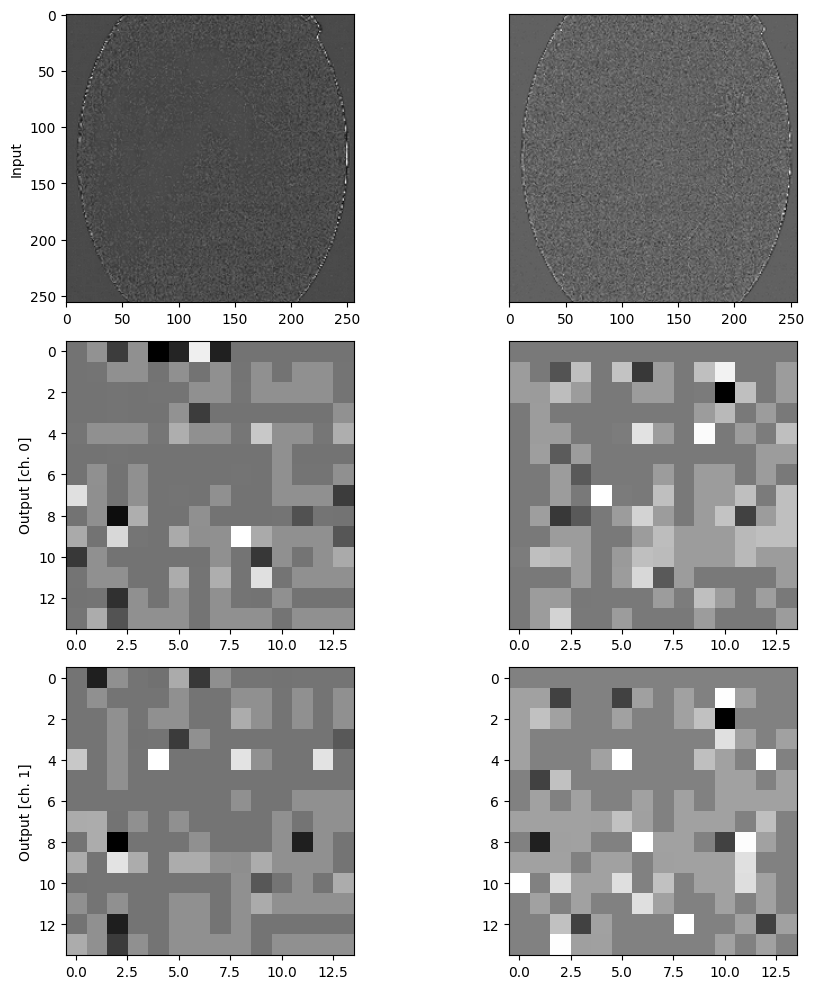

In [65]:
n_samples = 2
n_channels = 2
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(x_train[k, :, :, 0], cmap="gray")

    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[k, :, :, c], cmap="gray")

plt.tight_layout()
plt.show()

In [66]:
from keras.utils import to_categorical
# Define a mapping from class labels to integer labels
class_to_int = {
    'Healthy': 0,
    'Moderate': 1,
    'Mild': 2,
    'Proliferate': 3,
    'Severe': 4,
}
#
# Convert y labels to integer labels using the mapping
y_train_int = [class_to_int[label] for label in y_train]
y_test_int = [class_to_int[label] for label in y_test]

# Convert integer labels to one-hot encoded labels
num_classes = 5  # Number of classes
y_train_encoded = to_categorical(y_train_int, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_int, num_classes=num_classes)

In [71]:
y_train_encoded.shape
y_test_encoded.shape

(258, 5)

In [125]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
import numpy as np

# Train individual models (individual_model_1 and individual_model_2) on training data

# Generate predictions from individual models
predictions_1 = model1.predict(q_test_images)
predictions_2 = model2.predict(q_test_images)

num_classes = 5
# Create meta-model (stacked ensemble)
meta_input = Input(shape=(num_classes*2,))  # Combine predictions from both models
meta_layer = Dense(64, activation='relu')(meta_input)
meta_output = Dense(num_classes, activation='softmax')(meta_layer)
meta_model = Model(inputs=meta_input, outputs=meta_output)

# Combine predictions from individual models for meta-model input
stacked_predictions = np.concatenate((predictions_1, predictions_2), axis=1)

# Train meta-model using stacked predictions and original target labels
meta_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
meta_model.fit(stacked_predictions, y_test_encoded, batch_size=64, epochs=500, verbose=2)

# Generate predictions from meta-model using stacked predictions
meta_predictions = meta_model.predict(stacked_predictions)
meta_classes = np.argmax(meta_predictions, axis=1)

# Calculate accuracy of stacked ensemble (meta-model)
ensemble_accuracy = np.mean(meta_classes == y_test_encoded)
print(f"Stacked Ensemble Accuracy: {ensemble_accuracy}")


9/9 [==============================] - 0s 5ms/step
Epoch 1/500
5/5 - 2s - loss: 1.6280 - accuracy: 0.1512 - 2s/epoch - 476ms/step
Epoch 2/500
5/5 - 0s - loss: 1.6113 - accuracy: 0.1434 - 47ms/epoch - 9ms/step
Epoch 3/500
5/5 - 0s - loss: 1.5978 - accuracy: 0.1318 - 44ms/epoch - 9ms/step
Epoch 4/500
5/5 - 0s - loss: 1.5859 - accuracy: 0.3217 - 35ms/epoch - 7ms/step
Epoch 5/500
5/5 - 0s - loss: 1.5762 - accuracy: 0.3217 - 21ms/epoch - 4ms/step
Epoch 6/500
5/5 - 0s - loss: 1.5654 - accuracy: 0.3372 - 27ms/epoch - 5ms/step
Epoch 7/500
5/5 - 0s - loss: 1.5565 - accuracy: 0.3450 - 22ms/epoch - 4ms/step
Epoch 8/500
5/5 - 0s - loss: 1.5474 - accuracy: 0.3450 - 25ms/epoch - 5ms/step
Epoch 9/500
5/5 - 0s - loss: 1.5397 - accuracy: 0.3372 - 26ms/epoch - 5ms/step
Epoch 10/500
5/5 - 0s - loss: 1.5331 - accuracy: 0.3411 - 29ms/epoch - 6ms/step
Epoch 11/500
5/5 - 0s - loss: 1.5263 - accuracy: 0.3488 - 23ms/epoch - 5ms/step
Epoch 12/500
5/5 - 0s - loss: 1.5204 - accuracy: 0.3411 - 22ms/epoch - 4ms/ste

C:\Users\manya\AppData\Local\Temp\ipykernel_21012\1779826890.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  ensemble_accuracy = np.mean(meta_classes == y_test_encoded)


In [128]:
from sklearn.multioutput import ClassifierChain
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


chain_model = ClassifierChain(base_estimator=DecisionTreeClassifier(max_depth=500), order='random', random_state=42)

predictions_1 = model1.predict(q_train_images)
predictions_2 = model2.predict(q_train_images)


combined_predictions = np.concatenate((predictions_1, predictions_2), axis=1)

chain_model.fit(combined_predictions, y_train_encoded)


combined_test_predictions = np.concatenate(
    (model1.predict(q_test_images), model2.predict(q_test_images)),
    axis=1
)

chain_predictions = chain_model.predict(combined_test_predictions)


ensemble_accuracy = accuracy_score(y_test_encoded, chain_predictions)
print(f"Classifier Chain Ensemble Accuracy: {ensemble_accuracy*100:.2f}")


f1 = f1_score(y_test_encoded, chain_predictions, average='weighted')  # Use 'weighted' for multi-class
print(f"F1 Score: {f1*100:.3f}")


recall = recall_score(y_test_encoded, chain_predictions, average='weighted')  # Use 'weighted' for multi-class
print(f"Recall: {recall*100:.3f}")


9/9 [==============================] - 0s 5ms/step
Classifier Chain Ensemble Accuracy: 34.88
F1 Score: 36.498
Recall: 37.209


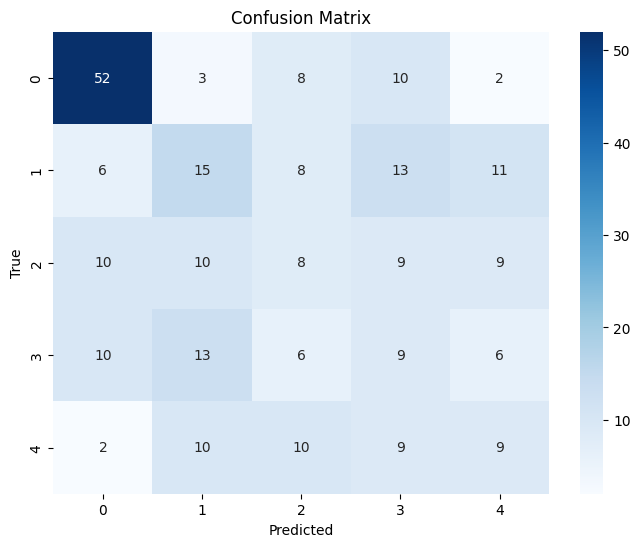

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming you have your model predictions and true labels
# chain_predictions: Model's predicted class labels (one-hot encoded)
# y_test_encoded: True class labels (one-hot encoded)

# Convert one-hot encoded labels back to original class labels
label_encoder = LabelEncoder()
y_test = np.argmax(y_test_encoded, axis=1)
y_pred = np.argmax(chain_predictions, axis=1)

# Fit the LabelEncoder
label_encoder.fit(y_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the class labels
class_labels = label_encoder.inverse_transform(np.unique(y_test))

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [121]:
 import joblib

model_filename = 'ensemble_model.joblib'
joblib.dump(chain_model, model_filename)

['ensemble_model.joblib']

In [132]:
from sklearn.multioutput import ClassifierChain
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score


chain_model1 = ClassifierChain(base_estimator=RandomForestClassifier(max_depth=1000,min_samples_split=1), random_state=42)

predictions1 = model1.predict(q_train_images)
predictions2 = model2.predict(q_train_images)


combined_predictions = np.concatenate((predictions1, predictions2), axis=1)

chain_model1.fit(combined_predictions, y_train_encoded)

combined_test_predictions1 = np.concatenate(
    (model1.predict(q_test_images), model2.predict(q_test_images)),
    axis=1
)

chain_predictions1 = chain_model.predict(combined_test_predictions1)

ensemble_accuracy1 = accuracy_score(y_test_encoded, chain_predictions1)
print(f"Classifier Chain Ensemble Accuracy: {ensemble_accuracy1*100:.2f}")

# Calculate F1 score
f1 = f1_score(y_test_encoded, chain_predictions1, average='weighted') 
print(f"F1 Score: {f1*100:.2f}")

# Calculate recall
recall = recall_score(y_test_encoded, chain_predictions1, average='weighted') 
print(f"Recall: {recall*100:.2f}")


9/9 [==============================] - 0s 4ms/step
Classifier Chain Ensemble Accuracy: 34.88
F1 Score: 36.50
Recall: 37.21


In [67]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
import numpy as np

# Assuming you have 'x_test' and 'y_true' as your test data and true labels

# Predict using the ensemble model
y_pred = ensemble_model.predict(q_train_images)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1 score
f1 = f1_score(y_test_encoded, y_pred_classes, average='weighted')  # Use 'weighted' for multi-class
print(f"F1 Score: {f1:.2f}")

# Calculate recall
recall = recall_score(y_true_encoded, y_pred_classes, average='weighted')  # Use 'weighted' for multi-class
print(f"Recall: {recall:.2f}")

19/19 [==============================] - 2s 3ms/step


ValueError: Found input variables with inconsistent numbers of samples: [258, 599]